In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# %qtconsole

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

from IPython.display import display
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
			
import pandas as pd
import numpy as np
from pathlib import Path		

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
# from folium.plugins import HeatMap
import branca

The data is obtained from https://at.govt.nz/about-us/reports-publications/traffic-counts/ and includes only records with coordinates. The coordinates were transfered from NZTM to longitude and latitude.

In [3]:
df = pd.read_csv(r'data/traffic-counts_v1.csv', parse_dates = ['Count Start Date'])
df.set_index('Count Start Date', inplace = True)
display_all(df.head())
df.info()

,Road Name,Carriageway Start Name,Carriageway End Name,5 Day ADT,7 Day ADT,Saturday Volume,Sunday Volume,AM Peak Volume,AM Peak Hour,Mid Peak Volume,Mid Peak Hour,PM Peak Volume,PM Peak Hour,Car,LCV,MCV,HCV-I,HCV-II,HCV Total,latitude,longitude
Count Start Date,,,,,,,,,,,,,,,,,,,,,
2015-11-04,LADIES MILE (REMUERA),REMUERA RD,ORMONDE RD,11488.0,10346.0,8471.0,6513.0,1101,745.0,873,1400.0,1212,1700.0,0.95,0.01,0.02,0.01,0.00,0.03,-36.883006,174.809151
2016-05-05,GRANDE VUE RD (MANUREWA),MOTORWAY ONRAMP (END ISLAND LHS),HILL RD,17898.0,17580.0,17770.0,15795.0,1460,NaN,1393,NaN,1279,NaN,0.90,0.01,0.08,0.00,0.00,0.09,-37.014364,174.904840
2017-05-04,GRANDE VUE RD (MANUREWA),MOTORWAY ONRAMP (END ISLAND LHS),HILL RD,18810.0,18014.0,17674.0,14374.0,1572,NaN,1369,NaN,1343,NaN,0.91,0.01,0.07,0.01,0.00,0.08,-37.014364,174.904840
2017-12-14,ST LUKES RD,CORNWALLIS ST,SANDRINGHAM RD (LHS),29674.0,28867.0,28201.0,25499.0,1849,900.0,2355,1130.0,2372,1800.0,0.92,0.01,0.02,0.03,0.01,0.05,-36.884606,174.736356
2017-12-18,KAWAKAWA BAY COAST RD-HC-WK1,TE PAPA RD,END,167.0,200.0,301.0,269.0,18,845.0,41,NaN,39,NaN,0.94,0.02,0.04,0.00,0.00,0.04,-36.938205,175.182248


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2695 entries, 2015-11-04 to 2019-04-09
Data columns (total 21 columns):
Road Name                 2695 non-null object
Carriageway Start Name    2691 non-null object
Carriageway End Name      2694 non-null object
5 Day ADT                 2694 non-null float64
7 Day ADT                 2694 non-null float64
Saturday Volume           2695 non-null float64
Sunday Volume             2695 non-null float64
AM Peak Volume            2695 non-null int64
AM Peak Hour              561 non-null float64
Mid Peak Volume           2695 non-null int64
Mid Peak Hour             867 non-null float64
PM Peak Volume            2695 non-null int64
PM Peak Hour              683 non-null float64
Car                       2695 non-null float64
LCV                       2695 non-null float64
MCV                       2695 non-null float64
HCV-I                     2695 non-null float64
HCV-II                    2695 non-null float64
HCV Total              

In [4]:
# function for create a visualization
def create_visualization(df_, date_range_min_, date_rage_max_, col_, percentile = 80, radius = 10):
    colorscale = branca.colormap.linear.YlGnBu_09.scale(min(df_[col_]), max(df_[col_]))
    df_ = df_.loc[date_range_min_:date_rage_max_]
    df_ = df_[df_[col_] > np.nanpercentile(df_[col_], percentile)]
    
    m = folium.Map(location = [-36.848461, 174.763336])  #show Auckland
    for long, lat, volume, road in zip(df_['longitude'], df_['latitude'], df_[col_], df_['Road Name']):
        folium.CircleMarker(location=(lat, long),
                        popup = f'{road}:{volume}',
                        radius=radius,
                        color=colorscale(volume),
                        fill=True).add_to(m)
    m.save('Auckland_map.html')
#    m._repr_html_()
    return m

# Questions to answer
- traffoc volume distribution/histogram
- how does the traffic volume change over time/ how stable is the traffic volume? can they be used for future estimation?
    - groupby (longitude, latitude)
    - get max, min over time and calculate the maximum difference
    - identify drastic change of volume (outliers)
- Identify sites with the highest traffic volumes
- pandas profiling on records with top traffic volumes



# Exploratory

## Date record histogram

The majority of the records are after 2018

(array([  1.,   1.,   0.,   0.,   1.,   0., 575., 931., 713., 473.]),
 array([735906. , 736031.2, 736156.4, 736281.6, 736406.8, 736532. ,
        736657.2, 736782.4, 736907.6, 737032.8, 737158. ]),
 <a list of 10 Patch objects>)

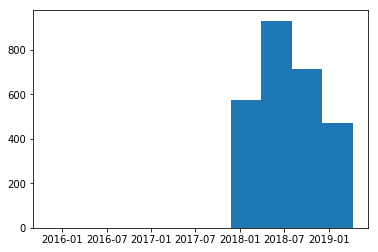

In [9]:
plt.hist(df.index)

In [11]:
df.index[df.index < '2017-07-31']
# only three records before 2017-07-31

DatetimeIndex(['2015-11-04', '2016-05-05', '2017-05-04'], dtype='datetime64[ns]', name='Count Start Date', freq=None)

(array([2.195e+03, 0.000e+00, 1.960e+02, 0.000e+00, 2.000e+01, 0.000e+00,
        9.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

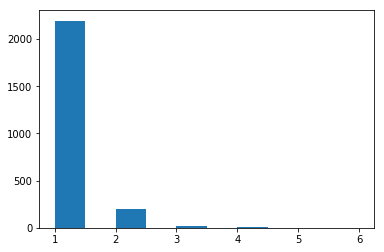

In [36]:
# check how often a place is sampled
plt.hist(df[['longitude', 'latitude', '7 Day ADT', 'Road Name']].groupby(['longitude', 'latitude']).size())

Most places are sampled once or twice. List out places that are sampled more than two times

In [57]:
sample_count = df.groupby(['longitude', 'latitude', 'Road Name'])['latitude'].count().to_frame('count').reset_index()
count_more_than_1 = sample_count[sample_count['count']>1]
count_more_than_1.sort_values(by = 'count').tail()

,longitude,latitude,Road Name,count
2408,174.989382,-37.185130,BOMBAY RD,2
2016,174.877165,-36.997284,WIRI STATION RD,3
1927,174.860778,-36.957460,BAIRDS RD,3
2058,174.885426,-37.039225,MAHIA RD,4
2160,174.904840,-37.014364,GRANDE VUE RD (MANUREWA),6


Found out about ONRC Categories, which defines a minimum frequency for conducting traffic count based on road category (e.g. roads classified as "high volume to arterial" has a minimum traffic-count frequency of once per year)
https://nzta.govt.nz/assets/Road-Efficiency-Group/docs/Traffic-estimate-data-Overview.pdf

## Traffic volume histogram

count     2694.000000
mean      9406.163326
std       8401.108109
min         13.000000
25%       2159.750000
50%       7334.500000
75%      14849.000000
max      45272.000000
Name: 7 Day ADT, dtype: float64

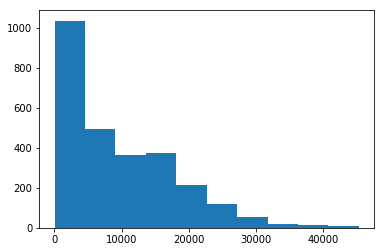

In [77]:
plt.hist(df['7 Day ADT'])
df['7 Day ADT'].describe()

# Change of traffic volume over time

In [66]:
temp = df.groupby(['longitude', 'latitude']).agg({'7 Day ADT':['count','min', 'max']})
temp.head()

7 Day ADT                
                          count     min     max
longitude  latitude                            
174.292680 -36.526972         1   465.0   465.0
174.316881 -36.559745         1   748.0   748.0
174.350804 -36.622501         1  2089.0  2089.0
174.419116 -36.650913         3  2495.0  2827.0
174.422101 -36.313721         1   416.0   416.0

In [70]:
temp2 = temp[temp['7 Day ADT']['count']>2]
temp2['diff'] = temp2['min'] - temp['max']
temp2['diff'].mean()

KeyError: 'min'

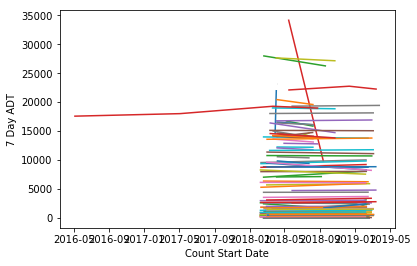

In [61]:
# plot 7 day adc over time
fig, ax = plt.subplots()
for long, lat in zip(count_more_than_1['longitude'], count_more_than_1['latitude']):
    df_temp = df[(df.longitude == long) & (df.latitude == lat)]
    sns.lineplot(x = df_temp.index, y = df_temp['7 Day ADT'], ax = ax)

There seem to be a similar time period between two records of the same coordinate. The change in traffic volume doesn't seem to vary a lot for the majority of cases.

From pandas profiling we know that all the traffic volume measures are highly correlated with each other. Here we will focus on 7 day average daily traffic

In [12]:
col = '7 Day ADT'

In [7]:
start_year = 2018
start_month = 5
start_day = 1
end_year = 2018
end_month = 6
end_day = 1
start_date = 1

In [9]:
p80 = np.nanpercentile(df[col], 75)
p80

14849.0

In [10]:
df_temp = df.loc['2018-05-01':'2018-05-31']
df_temp = df_temp[df_temp[col] > p80]

In [11]:
import branca
colorscale = branca.colormap.linear.YlGnBu_09.scale(min(df[col]), max(df[col]))

In [29]:
m = folium.Map(location = [-36.848461, 174.763336])  #show Auckland
radius = 5
for long, lat, volume, road in zip(df_temp['longitude'], df_temp['latitude'], df_temp[col], df_temp['Road Name']):
    folium.CircleMarker(location=(lat, long),
                        popup = f'{road}:{volume}',
                        radius=radius,
                        color=colorscale(volume),
                        fill=True).add_to(m)
m

In [36]:
m = folium.Map(location = [-36.848461, 174.763336])  #show Auckland
heatmapdata = [[row['latitude'], row['longitude'], row[col]] for index, row in df_temp.iterrows()]
HeatMap(heatmapdata, min_opacity = 0.5, radius=10, max_val = df_temp[col].max(), overlay = True).add_to(m)
# for long, lat, volume in zip(df_temp['latitude'], df_temp['longitude'], df_temp[col]):
#     heatmapdata
#     HeatMap(data = [lat, long, volume]
#                         ).add_to(m)
m

In [34]:
df_temp[col].max()

42944.0